In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [15]:
# path = '/home/ayd98/Desktop/MIPT/TXL/logs/wt103/'
path = '/home/ayd98/Desktop/MIPT/TXL/logs/enwik8/'
names = next(os.walk(path))[2]

In [16]:
def load_preproc_df(path):
    df = pd.read_csv(path, error_bad_lines=False, skiprows=70, sep='|', names = ['1', 'ep_step', 'batches', 'lr', 'ms_batch', 'loss', 'bpc'])
    df = df[df.columns[1:]].dropna()
    df.lr = df.lr.apply(lambda x: float(x[3:]))
    df.ms_batch = df.ms_batch.apply(lambda x: float(x[10:]))
    df.loss = df.loss.apply(lambda x: float(x[6:]))
    df.bpc = df.bpc.apply(lambda x: float(x[5:]))
    return df

In [17]:
dfs = []
for n in names:
    df_ = load_preproc_df(path+n)
    dfs.append(df_)

<ipython-input-17-cc933fbcc26d>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df_ = load_preproc_df(path+n)


In [18]:
names

['log-base-mem-256-256-enwik8.txt',
 'log-base-txl-512-enwik8.txt',
 'log_base_enwiki8.txt']

In [19]:
dfs[2]

,ep_step,batches,lr,ms_batch,loss,bpc
0,epoch 1 step 200,200 batches,2.500000e-04,192.54,2.47,3.55922
1,epoch 1 step 400,400 batches,2.500000e-04,174.03,1.72,2.48723
2,epoch 1 step 600,600 batches,2.500000e-04,174.08,1.58,2.27877
3,epoch 1 step 800,800 batches,2.500000e-04,173.89,1.49,2.14421
4,epoch 1 step 1000,1000 batches,2.500000e-04,174.89,1.38,1.98826
...,...,...,...,...,...,...
2292,epoch 51 step 399200,4200 batches,2.470000e-09,178.01,0.75,1.08260
2293,epoch 51 step 399400,4400 batches,1.390000e-09,178.19,0.76,1.09066
2294,epoch 51 step 399600,4600 batches,6.170000e-10,178.41,0.77,1.11498
2295,epoch 51 step 399800,4800 batches,1.540000e-10,178.48,0.77,1.10501


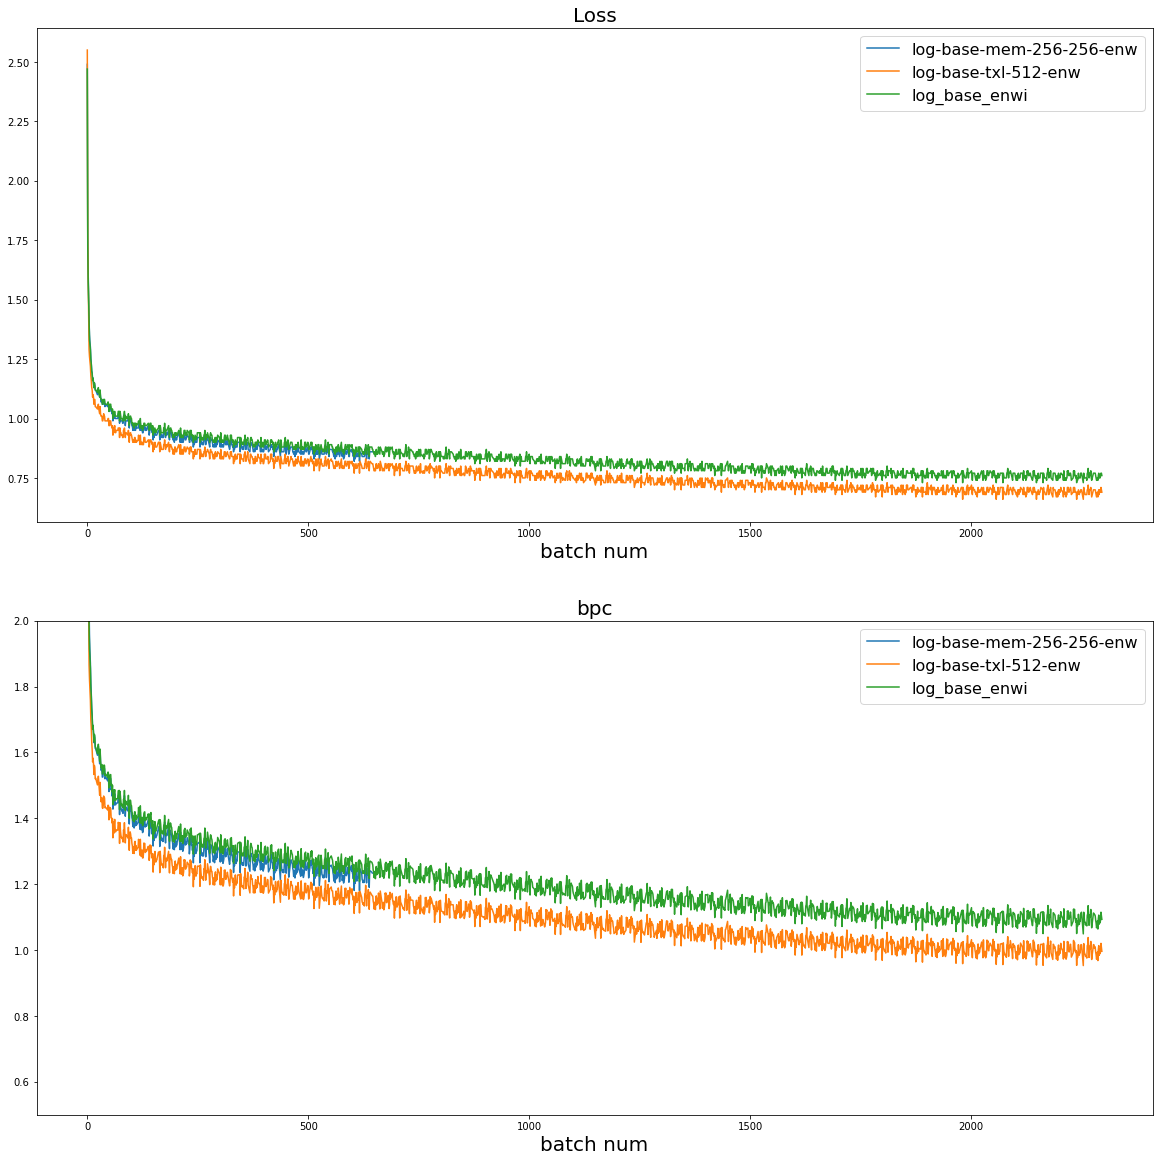

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(20, 20))
fs = 20

for df in dfs:
    axs[0].plot(df.loss)
    axs[1].plot(df.bpc)


legend = [n[:-7] for n in names]

axs[0].set_title('Loss', fontsize=fs)
axs[0].set_xlabel('batch num', fontsize=fs)
axs[0].legend(legend, fontsize=16)

axs[1].set_title('bpc', fontsize=fs)
axs[1].set_xlabel('batch num', fontsize=fs)
# axs[1].set_ylim(0, 200)
axs[1].set_ylim(0.5, 2)
axs[1].legend(legend, fontsize=16)

plt.savefig('g.png', format='png')
plt.show()


In [13]:
# fig, axs = plt.subplots(1, 2, figsize=(30,8))
# fs = 20

# axs[0].plot(df.loss.values)
# axs[0].set_title('Loss', fontsize=fs)
# axs[0].set_xlabel('batch num', fontsize=fs)
# axs[1].plot(df.bpc.values)
# axs[1].set_title('bpc', fontsize=fs)
# axs[1].set_xlabel('batch num', fontsize=fs)
# plt.show()


In [5]:
!ls ~/Desktop/MIPT/TXL/remote_logs

enwik8	LM-TFM-enwik8_local  memtrans-wt103  pytorch  wt103
